In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

figure 4

In [2]:
cancer_genes = ['BRAF','ALDOC','IDH1','TP53','KMT2D','KRAS','PIK3CA','PTEN','SPTA1']

explain where files are and how we got them 

In [3]:
delta_corr_df = pd.read_csv('data/delta_correlation_df_with_significance.csv')
correlation_df = pd.read_csv('data/tumor_normal_correlation_df.csv')

In [4]:
df = pd.merge(delta_corr_df, correlation_df)
df = df[df.Gene.isin(cancer_genes)]
df['Significant Delta Correlation'] = df.Significant == True

In [5]:
sns.set_context(rc={"font.size":16,"axes.titlesize":16,"axes.labelsize":16, 'xtick.labelsize': 12, 'ytick.labelsize': 12}) 


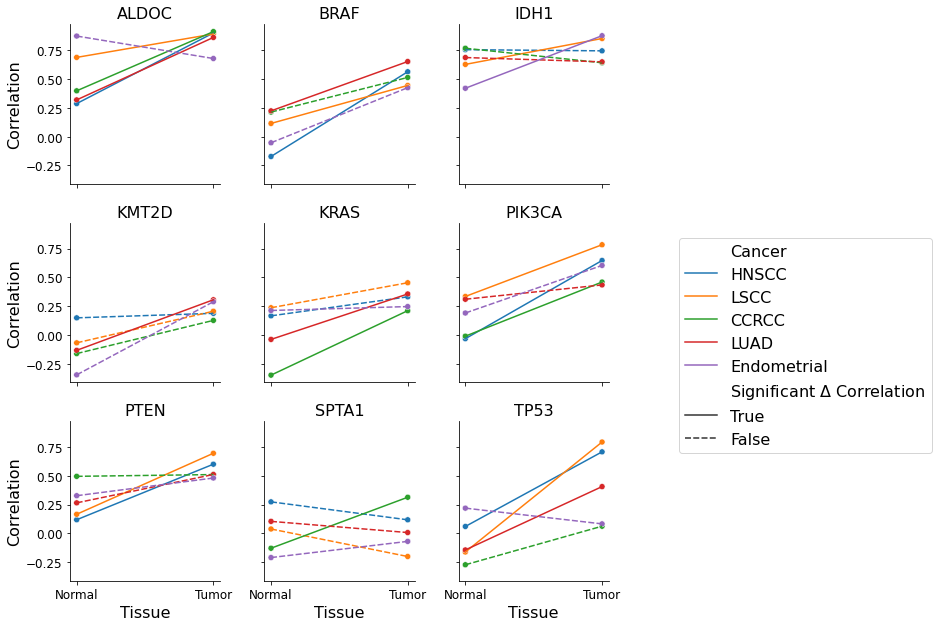

In [6]:
g = sns.FacetGrid(df, col ='Gene', height = 3, col_wrap = 3, sharex = True, sharey = True)
g.map_dataframe(sns.scatterplot, x = 'Tissue', y = 'Spearman_Rho', hue = 'Cancer', palette='tab10')
g.map_dataframe(sns.lineplot, x = 'Tissue', y = 'Spearman_Rho', hue = 'Cancer', palette='tab10', style = 'Significant Delta Correlation', style_order = [True, False], label = '_Hidden')
g.set_axis_labels('Tissue', 'Correlation')
g.set_titles('{col_name}')
current_handles, current_labels = plt.gca().get_legend_handles_labels()
del current_labels[:5]
del current_handles[:5]
current_labels[6] = 'Significant ' r'$\Delta$' +  ' Correlation'
g.tight_layout()
plt.legend(current_handles, current_labels, bbox_to_anchor=(3.2, 2.2))
plt.savefig('Figures/Figure_4_Interesting_Cancer_Genes_Correlation_Change',dpi = 600, bbox_inches='tight')